In [ ]:
 # importacion datos ya depurados y organizados
import pandas as pd
!wget https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
df = pd.read_csv('SaleHousesColPreprocesado.csv')

--2023-11-27 00:21:06--  https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15263287 (15M) [text/plain]
Saving to: ‘SaleHousesColPreprocesado.csv’

SaleHousesColPrepro 100%[===================>]  14.56M  --.-KB/s    in 0.1s    

2023-11-27 00:21:06 (139 MB/s) - ‘SaleHousesColPreprocesado.csv’ saved [15263287/15263287]



Archivo ya preprocesado

In [ ]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

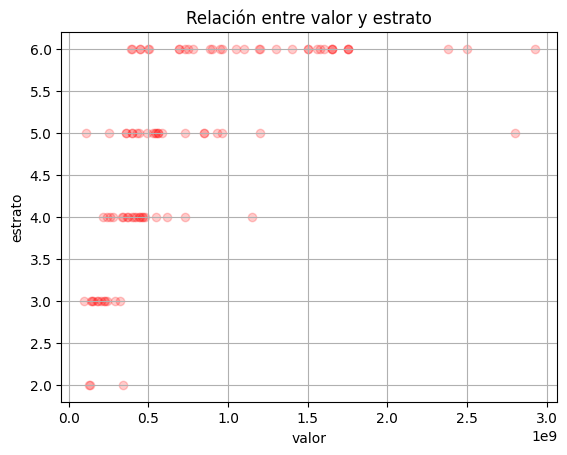

In [ ]:
d1 = df['valor'].head(100)
d2 = df['estrato'].head(100)

plt.scatter(d1, d2, color="red", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('estrato')  # Etiqueta del eje y
plt.title('Relación entre valor y estrato')  # Título del gráfico
plt.grid()
plt.show()


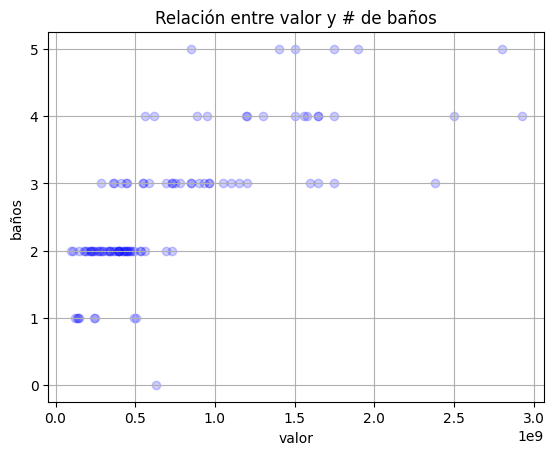

In [ ]:
d1 = df['valor'].head(100)
d2 = df['banos'].head(100)

plt.scatter(d1, d2, color="blue", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('baños')  # Etiqueta del eje y
plt.title('Relación entre valor y # de baños')  # Título del gráfico
plt.grid()
plt.show()


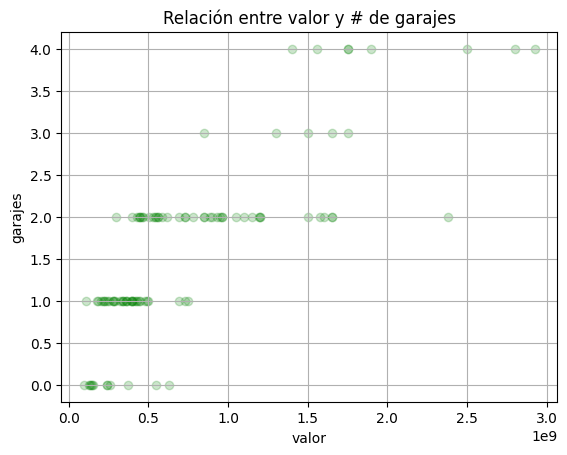

In [ ]:
d1 = df['valor'].head(100)
d2 = df['garajes'].head(100)

plt.scatter(d1, d2, color="green", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('garajes')  # Etiqueta del eje y
plt.title('Relación entre valor y # de garajes')  # Título del gráfico
plt.grid()
plt.show()


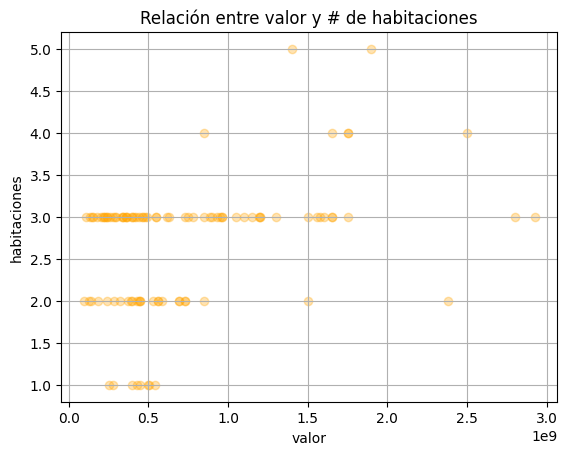

In [ ]:
d1 = df['valor'].head(100)
d2 = df['habitaciones'].head(100)

plt.scatter(d1, d2, color="orange", alpha=0.3)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('habitaciones')  # Etiqueta del eje y
plt.title('Relación entre valor y # de habitaciones')  # Título del gráfico
plt.grid()
plt.show()


In [ ]:
df_null = df[['valor', 'estrato','banos','habitaciones','garajes']].dropna() # se eliminan datos nulls

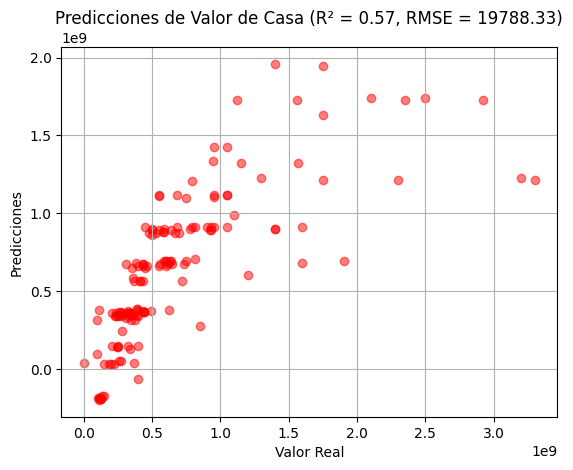

[9.09975575e+08]
0.7574082587469743


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Crear un modelo de Regresión Lineal Múltiple
mlr_reg = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
mlr_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = mlr_reg.predict(X_test)

# Calcular el coeficiente de determinación R² y rmse
r2 = r2_score(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
#plt.plot(y_test, y_test, [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')


plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, RMSE = {np.sqrt(rmse):.2f})')
plt.grid()
plt.show()

print(mlr_reg.predict([[3,6,2,3]]))
def rel_mrae(estimador, X, y):
  preds = estimador.predict(X)
  return np.mean(np.abs(preds-y)/y)

print(rel_mrae(mlr_reg, X,y))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

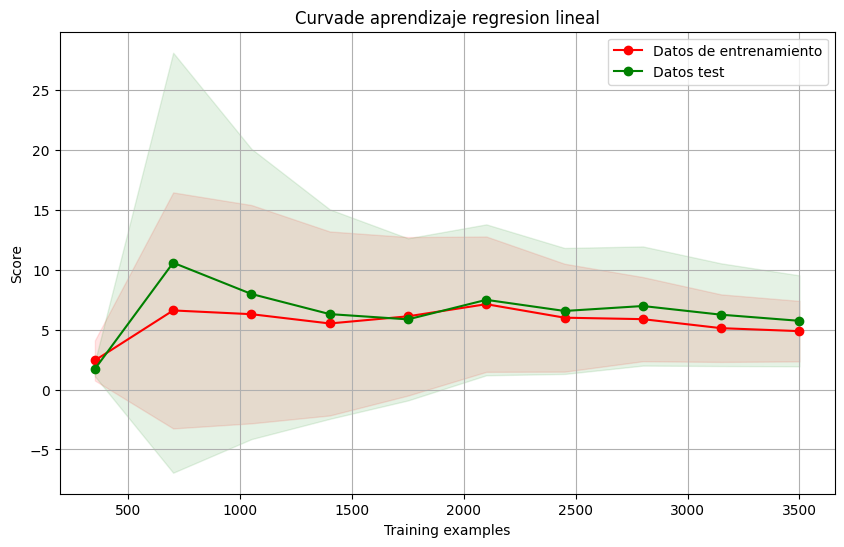

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Datos de entrenamiento"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Datos test"
    )

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits = 10, test_size=0.3)
estimator = LinearRegression()
plot_learning_curve(mlr_reg, "Curvade aprendizaje regresion lineal", X, y, cv, scoring=rel_mrae)

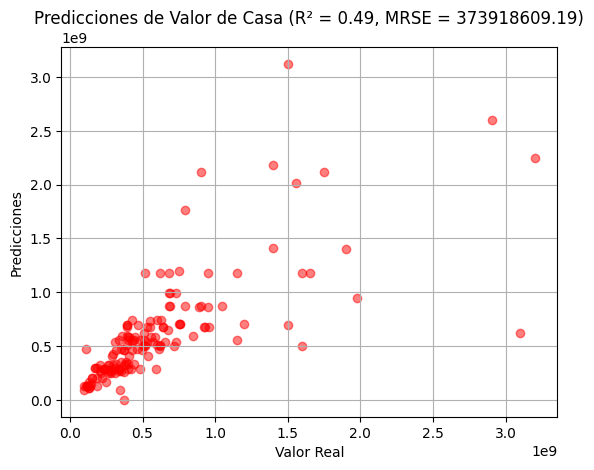

0.23146811098410291


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=20)

# Ajustar el modelo a los datos de entrenamiento
dt_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = dt_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
rmse = mean_squared_error(y_test, y_preds)

def rel_mrae(estimador, X, y):
  preds = estimador.predict(X)
  return np.mean(np.abs(preds-y)/y)

# Visualizar los datos originales y las predicciones
#plt.scatter(X, y, color='red', alpha=0.5)
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MRSE = {np.sqrt(rmse):.2f})')
plt.grid()
plt.show()

print(rel_mrae(dt_reg,X,y))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

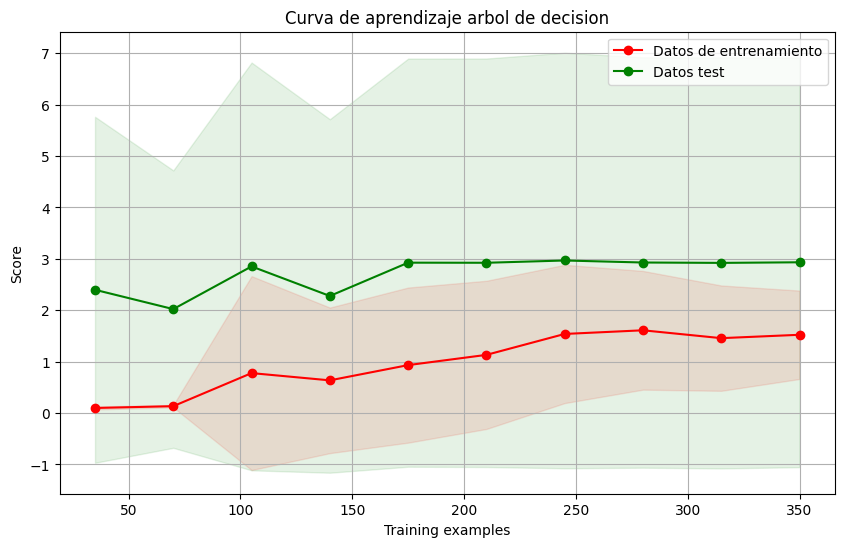

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Datos de entrenamiento"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Datos test"
    )

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits = 10, test_size=0.3)
plot_learning_curve(dt_reg, "Curva de aprendizaje arbol de decision", X, y, cv, scoring=rel_mrae)

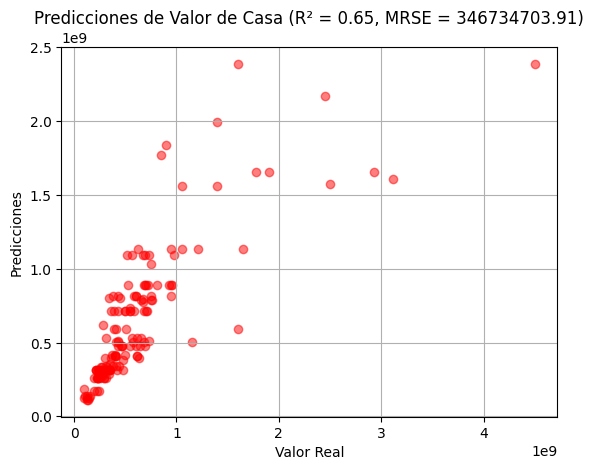

1.5937836369525933


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Crear un modelo de Random Forest Regressor
rf_reg = RandomForestRegressor(max_depth=10)

# Ajustar el modelo a los datos de entrenamiento
rf_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = rf_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
rmse = mean_squared_error(y_test, y_preds)

def rel_mrae(estimador, X, y):
  preds = estimador.predict(X)
  return np.mean(np.abs(preds-y)/y)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MRSE = {np.sqrt(rmse):.2f})')
plt.grid()
plt.show()

print(rel_mrae(rf_reg,X,y))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

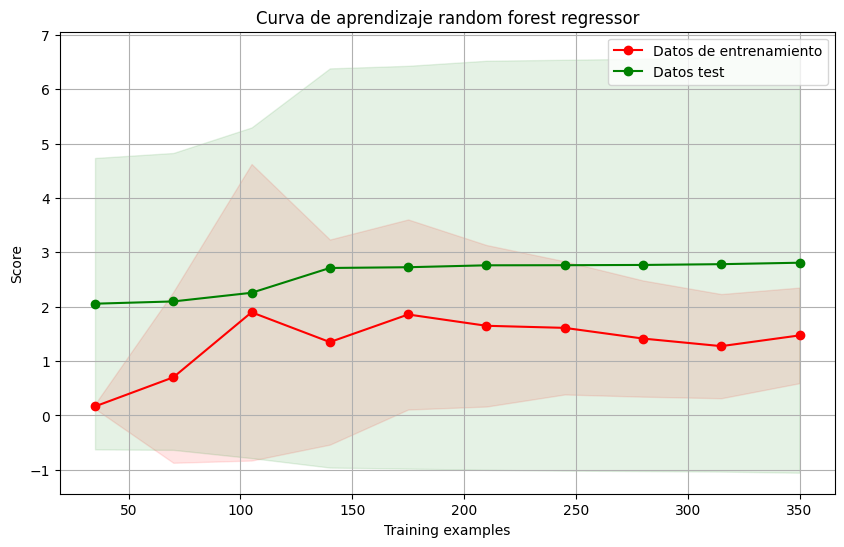

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Datos de entrenamiento"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Datos test"
    )

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits = 10, test_size=0.3)
plot_learning_curve(rf_reg, "Curva de aprendizaje random forest regressor", X, y, cv, scoring=rel_mrae)